In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import tensorflow as tf
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import sys
sys.path.append('..')
from dataset import batcher

In [117]:
MODEL_DIR = '../saved_models/'
LR_RATE = 0.0001
OPT = tf.keras.optimizers.Adam(learning_rate=LR_RATE)
LOSS = 'MeanSquaredError'
METRICS = ['RootMeanSquaredError']

In [182]:
# Get test split
# bands = ['BLUE', 'GREEN', 'RED', 'NIR', 'SW_IR1', 'SW_IR2', 'TEMP', 'VIIRS']
bands = ['VIIRS']
test_batcher = batcher.Batcher(bands, country_year='malawi-2016', bucket=False, shuffle=False, split='custom', repeat=1, batch_size=3511).get_dataset()
x_true = []
y_true = []
for x, y in test_batcher:
    x_true.append(x)
    y_true.append(y)

print(np.shape(x_true))

(1, 652, 224, 224, 1)


In [183]:
# Load model
experiments = ['imagery_sample_cnn_regression_NL']

def load_model_from_dir(model_name):
    model_path = MODEL_DIR + model_name + '.h5'
    model = tf.keras.models.load_model(model_path, compile=False)
    
    return model

In [184]:
# Get consumption predictions
trained_model = load_model_from_dir(experiments[0])
trained_model.compile(
    loss=LOSS,
    optimizer=OPT,
    metrics=METRICS,
)

y_preds = trained_model.predict(x_true)
print(y_preds)

2023-02-24 14:38:42.550420: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


21/21 [==============================] - 3s 125ms/step
[[-8.633246  ]
 [-7.3463397 ]
 [ 3.2381136 ]
 [-7.7780843 ]
 [-7.5771894 ]
 [-8.575448  ]
 [ 0.06234609]
 [-7.6174164 ]
 [-7.7688217 ]
 [-8.437942  ]
 [-8.082991  ]
 [-8.610717  ]
 [-8.604444  ]
 [-8.924834  ]
 [-5.5647435 ]
 [-7.7255936 ]
 [-8.119332  ]
 [-6.536901  ]
 [-8.119332  ]
 [-8.136078  ]
 [-7.9247174 ]
 [-3.7736495 ]
 [-8.479195  ]
 [-8.540139  ]
 [-7.7504773 ]
 [-8.169298  ]
 [-7.584227  ]
 [-6.9968705 ]
 [-8.33903   ]
 [-8.575448  ]
 [-6.6231694 ]
 [-8.370287  ]
 [ 3.5040038 ]
 [-9.030559  ]
 [-4.955603  ]
 [-8.021343  ]
 [-0.8891621 ]
 [-8.499682  ]
 [-7.7688217 ]
 [-8.428907  ]
 [-0.8891621 ]
 [-6.2427754 ]
 [-6.8525257 ]
 [-8.238084  ]
 [-8.572854  ]
 [-8.60057   ]
 [-8.573806  ]
 [-8.340408  ]
 [-8.510573  ]
 [-7.5085874 ]
 [-6.6031137 ]
 [-6.3808255 ]
 [-6.147016  ]
 [-8.3656845 ]
 [ 0.4227999 ]
 [-7.847176  ]
 [-8.722577  ]
 [-6.6264186 ]
 [ 0.28778565]
 [-7.132203  ]
 [-8.443845  ]
 [-2.1042273 ]
 [-7.940659  ]


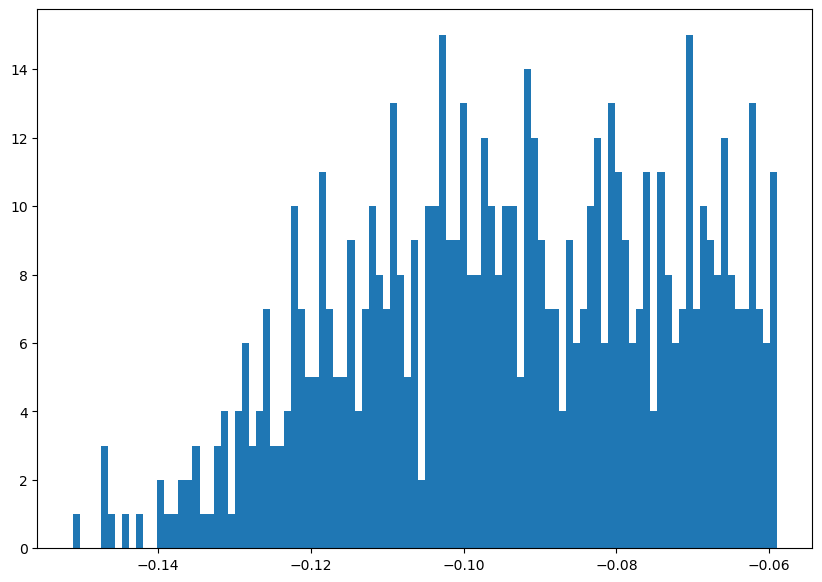

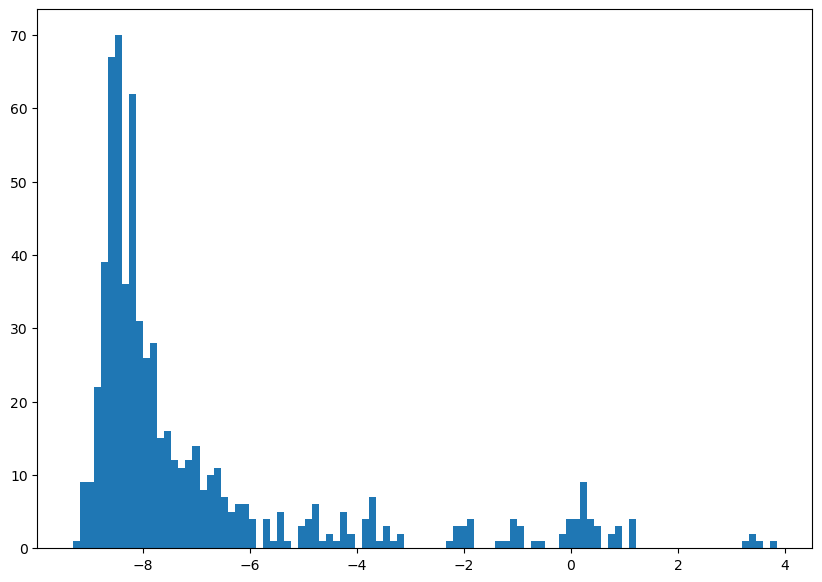

In [185]:
# Find r-squared
y_true = np.squeeze(y_true)
y_preds = np.squeeze(y_preds)

# Plot histograms
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(y_true, bins = 100)
plt.show()

fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(y_preds, bins = 100)
plt.show()

y_true = 2 * ((y_true - min(y_true)) / (max(y_true) - min(y_true))) - 1
y_preds =2 * ((y_preds - min(y_preds)) / (max(y_preds) - min(y_preds))) - 1


r2 = pearsonr(y_true, y_preds)[0]

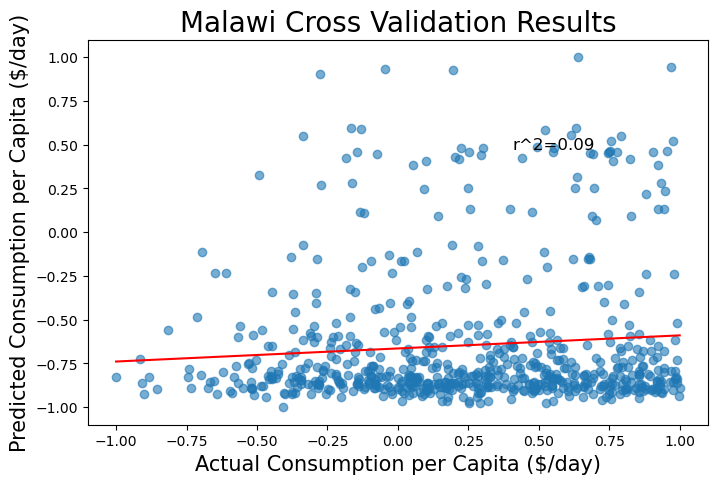

In [186]:
# Plot predictions
country = 'Malawi'
fig = plt.figure(figsize=(8,5))
plt.scatter(y_true, y_preds, alpha=0.6)
plt.plot(np.unique(y_true), np.poly1d(np.polyfit(y_true, y_preds, 1))(np.unique(y_true)), color='red')
plt.text(0.5, 0.5, f'r^2={round(r2, 2)}', ha='left', va='top', size=12, transform=ax.transAxes)
plt.xlabel('Actual Consumption per Capita ($/day)', fontsize=15)
plt.ylabel('Predicted Consumption per Capita ($/day)', fontsize=15)
plt.title(f'{country} Cross Validation Results', fontsize=20)
# plt.xlim([np.min(y_true), 10])
# plt.ylim([np.min(y_true), 10])
plt.show()